In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from summit.strategies.tsemo import TSEMO, TSEMOInternalWrapper
from summit.benchmarks import DTLZ2, VLMOP2
from summit.utils.models import GPyModel
from summit.utils.multiobjective import pareto_efficient, hypervolume
from summit.utils.dataset import DataSet

from pymoo.model.problem import Problem
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.factory import get_termination

from GPy.kern import Exponential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import warnings
from fastprogress.fastprogress import master_bar, progress_bar
import time
from IPython.display import clear_output

## DTLZ2 Test

In [ ]:
#Run the DTLZ2 benchmark
batch_size = 1
errors = 0
num_inputs=3
num_objectives=2
lab = DTLZ2(num_inputs=num_inputs, 
            num_objectives=num_objectives)
tsemo_options = dict(pop_size=100,                          #population size for NSGAII
                     iterations=100,                        #iterations for NSGAII
                     n_spectral_points=1500,                #number of spectral points for spectral sampling
                     num_restarts=100,                      #number of restarts for GP optimizer (LBSG)
                     parallel=True)                         #operate GP optimizer in parallel


warnings.filterwarnings("ignore", category=RuntimeWarning)
input_min = DataSet(np.zeros([1, num_inputs]), columns=[f'x_{i}' for i in range(num_inputs)])
input_max = DataSet(np.ones([1, num_inputs]), columns=[f'x_{i}' for i in range(num_inputs)])
tsemo = TSEMO(lab.domain, random_rate=0.00, 
              inputs_min=input_min, inputs_max=input_max)
experiments = tsemo.suggest_experiments(5*num_inputs)
# experiments = pd.read_csv('3x3_lhs_matlab.csv', names=[f'x_{i}' for i in range(num_inputs)])
# experiments = DataSet.from_df(experiments)

for i in range(100):
    print(f"Iteration {i}")
    # Run experiments
    experiments = lab.run_experiments(experiments)

    # Get suggestions
    experiments = tsemo.suggest_experiments(batch_size, experiments,
                                            **tsemo_options)
    
    # Hypervolume
    clear_output(wait=True)
    pareto, _ = pareto_efficient(lab.data[['y_0', 'y_1']].to_numpy(), maximize=False)
    hv = hypervolume(pareto, [11,11])
    
    #Plot pareto front
    fig, ax = plt.subplots()
    ax.set_title(f'Iteration {i}, Hv:{round(hv, 3)}, HvI: {round(tsemo.hv_imp,3)}')
    
    #Experiments before last round
    ax.scatter(lab.data['y_0'].iloc[:-batch_size], 
               lab.data['y_1'].iloc[:-batch_size], 
               alpha=0.2, c='k', label="Past experiments")
    
    #Proposed experiments drawn using NSGA-II
    samples = tsemo.samples[-1]
    cs = ax.scatter(samples['y_0'], samples['y_1'], c=samples['hvi'])
    cb = plt.colorbar(cs,ax=ax)
    cb.set_label('Proposed Experiments (NSGA-II) HvI')
    
    #Point(s) chosen
    if i > 0:
        ax.scatter(last_predictions['y_0'],
                   last_predictions['y_1'],
                   marker="*", s=100, c="Red", label="Last experiment(s) chosen (predicted)")
        ax.scatter(lab.data['y_0'].iloc[-batch_size:], 
                   lab.data['y_1'].iloc[-batch_size:], 
                   marker="*", s=100,c="Green", label="Last experiment(s) chosen (actual)")
    last_predictions = experiments
    ax.scatter(experiments['y_0'], experiments['y_1'], 
               marker="*", s=100, c='blue', label="New experiment(s) chosen (predicted)")
    ax.legend(loc=(1.5,0.5))
    print("\n Choosen Input Values:", experiments[f'x_{i}' for i in range(num_inputs)])
    plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x126cf2208>)

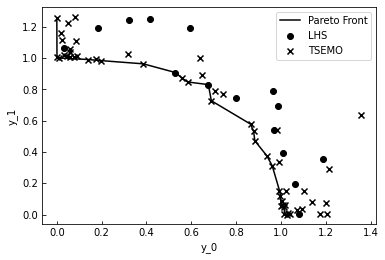

In [4]:
lab.pareto_plot()

In [7]:
pareto_data = lab.pareto_data
pareto_data[(pareto_data['x_0']>0.4)&(pareto_data['x_0']<0.56)]

,computation_t,experiment_t,strategy,x_0,x_1,x_2,y_0,y_1
49,32.0102,0.00448895,TSEMO,0.516967,0.486403,0.539647,0.689221,0.726973


## VLMOP2

Total Time elapsed: 958.92 seconds 



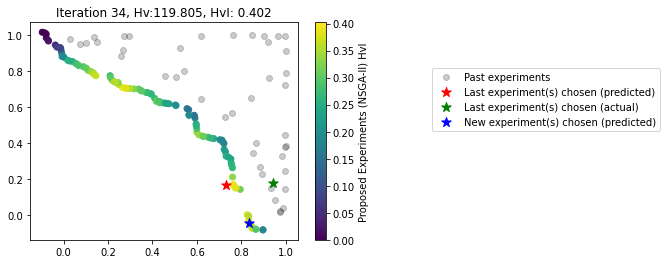


 Choosen input values iteration 34:
NAME       x_0      x_1
TYPE      DATA     DATA
32   -0.721989 -0.69624


Iteration 35
Fitting models (number of optimization restarts=100)

KeyboardInterrupt caught, calling on_optimization_end() to round things upKeyboardInterrupt caught, calling on_optimization_end() to round things up

KeyboardInterrupt caught, calling on_optimization_end() to round things up

Process ForkPoolWorker-283:
Process ForkPoolWorker-284:


KeyboardInterrupt caught, calling on_optimization_end() to round things up


Process ForkPoolWorker-281:


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-282:
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "/Users/Kobi/m

Ctrl+c received, terminating and joining pool.


  File "/Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-TfmmV07p-py3.7/lib/python3.7/site-packages/GPy/core/gp.py", line 659, in optimize
    ret = super(GP, self).optimize(optimizer, start, messages, max_iters, ipython_notebook, clear_after_finish, **kwargs)
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/Users/Kobi/miniconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result =

UnboundLocalError: local variable 'jobs' referenced before assignment

In [3]:
#Run the DTLZ2 benchmark
batch_size = 1
errors = 0
num_inputs=2
num_objectives=2
lab = VLMOP2()
warnings.filterwarnings("ignore", category=RuntimeWarning)
tsemo = TSEMO(lab.domain)
experiments = tsemo.suggest_experiments(5*num_inputs)

start_time = time.time()
for i in range(100):
    print(f"Iteration {i}")
    # Run experiments
    experiments = lab.run_experiments(experiments)

    # Get suggestions
    experiments = tsemo.suggest_experiments(batch_size, experiments)
    
    # Hypervolume
    clear_output(wait=True)
    pareto, _ = pareto_efficient(lab.data[['y_0', 'y_1']].to_numpy(), maximize=False)
    hv = hypervolume(pareto, [11,11])
    
    #Plot pareto front
    fig, ax = plt.subplots()
    ax.set_title(f'Iteration {i}, Hv:{round(hv, 3)}, HvI: {round(tsemo.hv_imp,3)}')
    
    #Experiments before last round
    ax.scatter(lab.data['y_0'].iloc[:-batch_size], 
               lab.data['y_1'].iloc[:-batch_size], 
               alpha=0.2, c='k', label="Past experiments")
    
    #Proposed experiments drawn using NSGA-II
    samples = tsemo.samples[-1]
    cs = ax.scatter(samples['y_0'], samples['y_1'], c=samples['hvi'])
    cb = plt.colorbar(cs,ax=ax)
    cb.set_label('Proposed Experiments (NSGA-II) HvI')
    
    #Point(s) chosen
    if i > 0:
        ax.scatter(last_predictions['y_0'],
                   last_predictions['y_1'],
                   marker="*", s=100, c="Red", label="Last experiment(s) chosen (predicted)")
        ax.scatter(lab.data['y_0'].iloc[-batch_size:], 
                   lab.data['y_1'].iloc[-batch_size:], 
                   marker="*", s=100,c="Green", label="Last experiment(s) chosen (actual)")
    last_predictions = experiments
    ax.scatter(experiments['y_0'], experiments['y_1'], 
               marker="*", s=100, c='blue', label="New experiment(s) chosen (predicted)")
    ax.legend(loc=(1.5,0.5))
    print("Total Time elapsed: {:.2f} seconds \n".format(round(time.time()-start_time,2)))
    plt.show()
    print(f"\n Choosen input values iteration {i}:")
    print(experiments[[f'x_{i}' for i in range(num_inputs)]])
   
    print("\n")